In [9]:
from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
from alpaca.models.model_library import QED_DFSZ, beta

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [5]:
ma = np.linspace(0.103, 5.0, 100)
fa = np.logspace(3, 7, 100)
couplings = [QED_DFSZ.get_couplings({beta: np.pi/4}, f).match_run(5.1, 'VA_below', 'leadinglog') for f in fa]
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)

In [6]:
transitions = [
    'B+ -> K+ a',
    'B0 -> K*0 a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
]

In [7]:
chi2 = get_chi2(transitions, x_ma, y_couplings, y_fa, integrator='no_rge')

/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
/home/geonosis/Documents/alpaca/alp-aca/alpaca/experimental_data/classes.py:77: RuntimeWarning: invalid value encountered in sqrt
  pa_parent = np.sqrt(kallen(self.mass_parent**2, ma**2, self.mass_sibling**2))/(2*self.mass_parent)
/home/geonosis/Documents/alpaca/alp-aca/alpaca/decays/mesons/invisible.py:36: RuntimeWarning: invalid value encountered in sqrt
  return mB**3*abs(gq_eff)**2/(64*np.pi) * f0_BK(ma**2)**2*np.sqrt(kallen(1, mK**2/mB**2, ma**2/mB**2))*(1-mK**2/mB**2)**2
/home/geonosis/.cache/pypoetry/virtualenvs/alpaca-YZhijjtZ-py3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])
/home/geonosis/Documen

In [29]:
for obs in chi2.keys():
    print(obs)

('B+ -> K+ a', 'Belle II')
('B0 -> K*0 a', 'BaBar')
('B+ -> K+ e e', 'Belle II')
('B0 -> K*0 e e', 'Belle II')
('B+ -> K+ mu mu', 'LHCb')
('B+ -> K+ mu mu', 'Belle II')
('B+ -> K+ mu mu', 'CHARM')
('B0 -> K*0 mu mu', 'LHCb')
('B0 -> K*0 mu mu', 'Belle II')
('', 'Global')


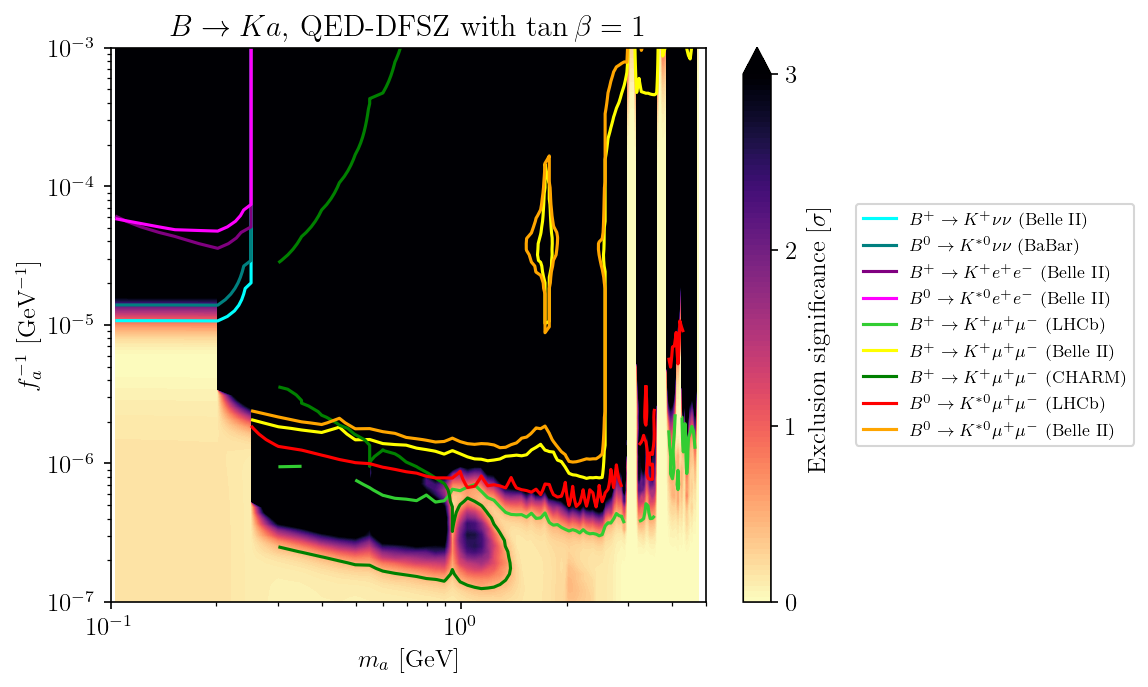

In [28]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []
pl = plt.contourf(x_ma, 1/y_fa, nsigmas(chi2[('', 'Global')],2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(x_ma, 1/y_fa, nsigmas(chi2_obs, 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.xlim(0.1, 5)
plt.title(r'$B \to K a$, QED-DFSZ with $\tan\beta = 1$')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)